## Reload Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader.data as web
import statsmodels.api as sm
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Filter Market_Excess_Return and Risk_Free_Rate from Dataset

In [ ]:
# Step 1: Read the CSV file
df = pd.read_csv('/content/drive/My Drive/CAPM_Project/2025-03_FourFactors_and_Market_Returns_Monthly_SurvivorshipBiasAdjusted.csv')

# Step 2: Fix the date column
# Assuming your date column is named 'Date'
df['Date'] = pd.to_datetime(df['Date'] + '-01')

# Step 3: Drop columns you don't need
# Replace with the actual column names you want to drop
columns_to_drop = ['SMB', 'HML', 'WML']
df = df.drop(columns=columns_to_drop, errors='ignore')  # ignore if column not found

# Step 4: Rename columns (adjust dictionary keys and values)
rename_dict = {
    'MF': 'Excess_Market',
    'RF': 'Risk_Free_Rate'
}
df = df.rename(columns=rename_dict)

# Step 5: Filter by date range
# Define start and end dates
start_date = '2012-02-01'
end_date = '2025-03-01'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

save_path = "/content/drive/My Drive/CAPM_Project/Output1.csv"
# Step 6: Save to a new CSV
filtered_df.to_csv(save_path, index=False)

# View result
print(filtered_df.head())

          Date  Excess_Market  Risk_Free_Rate
220 2012-02-01       4.375281        0.679329
221 2012-03-01      -3.122352        0.712054
222 2012-04-01      -1.542288        0.710284
223 2012-05-01      -6.366309        0.687982
224 2012-06-01       4.897375        0.633663


In [ ]:
# Step 1: Read the original CSV
file_path = '/content/drive/My Drive/CAPM_Project/Output1.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Step 2: Divide specific columns by 100
# Replace with the actual column names you want to modify
columns_to_modify = ['Excess_Market', 'Risk_Free_Rate']

for col in columns_to_modify:
    if col in df.columns:
        df[col] = df[col] / 100

cutoff_date = '2012-03-01'  # Change this to your desired cutoff
df = df[df['Date'] >= cutoff_date]

# Step 3: Save back to the same file (overwrite)
df.to_csv(file_path, index=False)


## Compute INFY_Return, Market_Return, Risk_Free, INFY_Excess, Market_Excess.


> INFOSYS Stock



In [ ]:
# Step 1: Read the original CSV
df = pd.read_csv('/content/drive/My Drive/CAPM_Project/stocks/INFY.csv')  # Replace with your actual filename

# Step 2: Compute percentage change (return) on a specific column
target_column = 'INFY.NS'  # Replace with the column you want to use for return
return_column_name = 'INFY_Return'

if target_column in df.columns:
    df[return_column_name] = df[target_column].pct_change()


# Step 3: Drop rows with any NaN values
df = df.dropna()

cutoff_date = '2025-03-01'  # Change this to your desired cutoff
df = df[df['Date'] <= cutoff_date]

save_path = "/content/drive/My Drive/CAPM_Project/Output2.csv"
# Step 4: Save to a new CSV
df.to_csv(save_path, index=False)

# View result
print(df.head())


         Date     INFY.NS  INFY_Return
1  2012-03-01  260.998657    -0.005948
2  2012-04-01  224.193176    -0.141018
3  2012-05-01  221.211060    -0.013302
4  2012-06-01  229.459091     0.037286
5  2012-07-01  203.648193    -0.112486


In [ ]:
# Step 1: Read both CSV files
df1 = pd.read_csv("/content/drive/My Drive/CAPM_Project/Output2.csv")  # e.g., contains INFY_Return
df2 = pd.read_csv('/content/drive/My Drive/CAPM_Project/Output1.csv')  # e.g., contains Market_Return or RiskFree_Return

# Step 2: Convert 'Date' column to datetime (ensure consistency)
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Step 3: Merge the dataframes on 'Date'
merged_df = pd.merge(df1, df2, on='Date', how='inner')

# Step 4: Subtract the two columns to compute 'Excess_INFY'
# Replace with actual column names from the two files
merged_df['Excess_INFY'] = merged_df['INFY_Return'] - merged_df['Risk_Free_Rate']

save_path = "/content/drive/My Drive/CAPM_Project/CAPM_Dataset.csv"
# Step 5: Save to a new CSV
merged_df.to_csv(save_path, index=False)



> HDFCBANK Stock



In [ ]:
# Step 1: Read the original CSV
df = pd.read_csv('/content/drive/My Drive/CAPM_Project/stocks/HDFCBANK.csv')  # Replace with your actual filename

# Step 2: Compute percentage change (return) on a specific column
target_column = 'HDFCBANK.NS'  # Replace with the column you want to use for return
return_column_name = 'HDFC_Return'

if target_column in df.columns:
    df[return_column_name] = df[target_column].pct_change()


# Step 3: Drop rows with any NaN values
df = df.dropna()

cutoff_date = '2025-03-01'  # Change this to your desired cutoff
df = df[df['Date'] <= cutoff_date]

save_path = "/content/drive/My Drive/CAPM_Project/Final_Datasets/HDFC Bank/Output2.csv"
# Step 4: Save to a new CSV
df.to_csv(save_path, index=False)

# View result
print(df.head())

         Date  HDFCBANK.NS  HDFC_Return
1  2012-03-01   234.597992     0.005318
2  2012-04-01   244.819458     0.043570
3  2012-05-01   228.438034    -0.066912
4  2012-06-01   254.318954     0.113295
5  2012-07-01   267.333832     0.051175


In [ ]:
# Step 1: Read both CSV files
df1 = pd.read_csv("/content/drive/My Drive/CAPM_Project/Final_Datasets/HDFC Bank/Output2.csv")  # e.g., contains HDFC_Return
df2 = pd.read_csv('/content/drive/My Drive/CAPM_Project/Final_Datasets/Output1.csv')  # e.g., contains Market_Return or RiskFree_Return

# Step 2: Convert 'Date' column to datetime (ensure consistency)
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Step 3: Merge the dataframes on 'Date'
merged_df = pd.merge(df1, df2, on='Date', how='inner')

# Step 4: Subtract the two columns to compute 'Excess_INFY'
# Replace with actual column names from the two files
merged_df['Excess_HDFC'] = merged_df['HDFC_Return'] - merged_df['Risk_Free_Rate']

save_path = "/content/drive/My Drive/CAPM_Project/Final_Datasets/HDFC Bank/CAPM_Dataset_HDFC.csv"
# Step 5: Save to a new CSV
merged_df.to_csv(save_path, index=False)



> RELIANCE Stock



In [ ]:
# Step 1: Read the original CSV
df = pd.read_csv('/content/drive/My Drive/CAPM_Project/stocks/RELIANCE.csv')  # Replace with your actual filename

# Step 2: Compute percentage change (return) on a specific column
target_column = 'RELIANCE.NS'  # Replace with the column you want to use for return
return_column_name = 'RELI_Return'

if target_column in df.columns:
    df[return_column_name] = df[target_column].pct_change()


# Step 3: Drop rows with any NaN values
df = df.dropna()

cutoff_date = '2025-03-01'  # Change this to your desired cutoff
df = df[df['Date'] <= cutoff_date]

save_path = "/content/drive/My Drive/CAPM_Project/Final_Datasets/Reliance/Output2.csv"
# Step 4: Save to a new CSV
df.to_csv(save_path, index=False)

# View result
print(df.head())

         Date  RELIANCE.NS  RELI_Return
1  2012-03-01   166.198257    -0.085471
2  2012-04-01   164.980438    -0.007328
3  2012-05-01   156.234314    -0.053013
4  2012-06-01   163.375122     0.045706
5  2012-07-01   164.648300     0.007793


In [ ]:
# Step 1: Read both CSV files
df1 = pd.read_csv("/content/drive/My Drive/CAPM_Project/Final_Datasets/Reliance/Output2.csv")  # e.g., contains RELI_Return
df2 = pd.read_csv('/content/drive/My Drive/CAPM_Project/Final_Datasets/Output1.csv')  # e.g., contains Market_Return or RiskFree_Return

# Step 2: Convert 'Date' column to datetime (ensure consistency)
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Step 3: Merge the dataframes on 'Date'
merged_df = pd.merge(df1, df2, on='Date', how='inner')

# Step 4: Subtract the two columns to compute 'Excess_INFY'
# Replace with actual column names from the two files
merged_df['Excess_RELI'] = merged_df['RELI_Return'] - merged_df['Risk_Free_Rate']

save_path = "/content/drive/My Drive/CAPM_Project/Final_Datasets/Reliance/CAPM_Dataset_RELI.csv"
# Step 5: Save to a new CSV
merged_df.to_csv(save_path, index=False)

## Fit CAPM Model on Indian Stocks and Various Plots


> INFOSYS Stock




> Scatter Plot of Excess Infosys Return and Excess Market Return



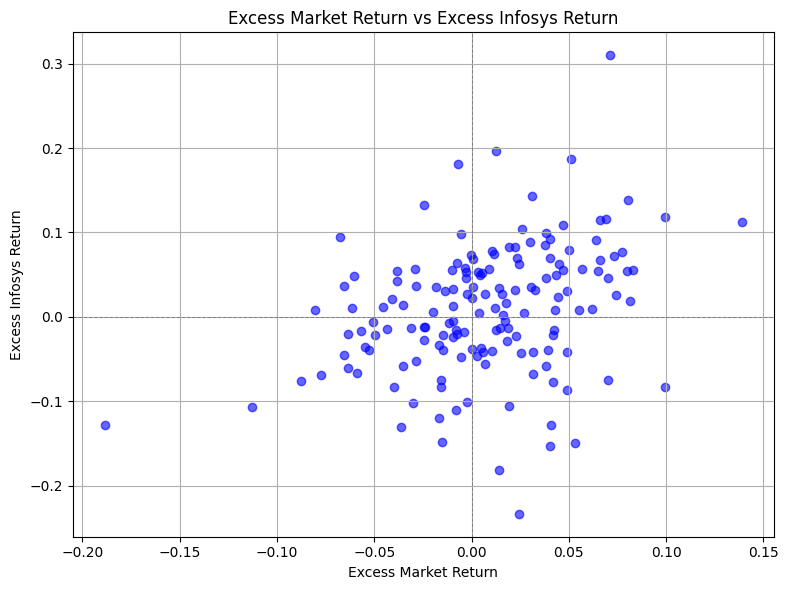

In [ ]:
# Replace with the actual path to your CSV file in Google Drive
file_path = "/content/drive/My Drive/CAPM_Project/Final_Datasets/Infosys/CAPM_Dataset_INFOSYS.csv"

# Load the file
merged_df = pd.read_csv(file_path)

# Display a few rows
merged_df.head()

# Basic scatter plot
plt.figure(figsize=(8,6))
plt.scatter(merged_df['Excess_Market'], merged_df['Excess_INFY'], color='blue', alpha=0.6)

plt.title('Excess Market Return vs Excess Infosys Return')
plt.xlabel('Excess Market Return')
plt.ylabel('Excess Infosys Return')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.grid(True)
plt.tight_layout()
plt.show()



> Regression Fit



In [ ]:
# Define X and y
X = merged_df['Excess_Market']
y = merged_df['Excess_INFY']

# Add constant to estimate alpha (intercept)
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X).fit(cov_type='HC1')

# Show regression summary
print(model.summary())

alpha = model.params['const']
beta = model.params['Excess_Market']

print(f"Alpha (intercept): {alpha:.4f}")
print(f"Beta (slope): {beta:.4f}")

                            OLS Regression Results                            
Dep. Variable:            Excess_INFY   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     22.75
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           4.22e-06
Time:                        19:41:17   Log-Likelihood:                 189.55
No. Observations:                 157   AIC:                            -375.1
Df Residuals:                     155   BIC:                            -369.0
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0049      0.006      0.878

In [ ]:
X.shape

(157, 2)

In [ ]:
y.shape

(157,)



> Scatter Plot of Excess Market Return and Residuals



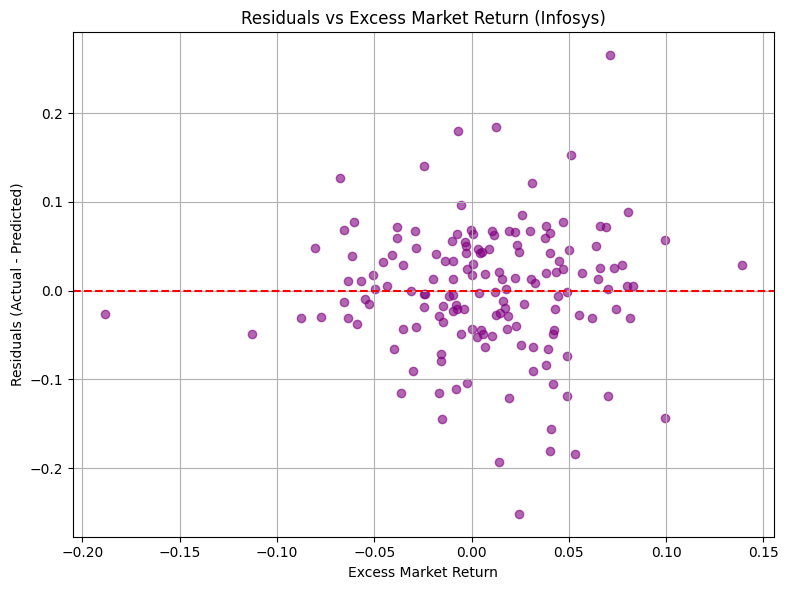

In [ ]:
# Step 1: Predict Infosys excess return using the model
merged_df['Predicted_Excess_INFY'] = model.predict(X)

# Step 2: Calculate residuals
merged_df['Residuals'] = y - merged_df['Predicted_Excess_INFY']

# Step 3: Plot residuals vs Excess Market Return
plt.figure(figsize=(8,6))
plt.scatter(X['Excess_Market'], merged_df['Residuals'], color='purple', alpha=0.6)

# Plot horizontal line at y = 0
plt.axhline(0, color='red', linestyle='--')

# Labels and title
plt.title("Residuals vs Excess Market Return (Infosys)")
plt.xlabel("Excess Market Return")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()



> Histogram of Residuals



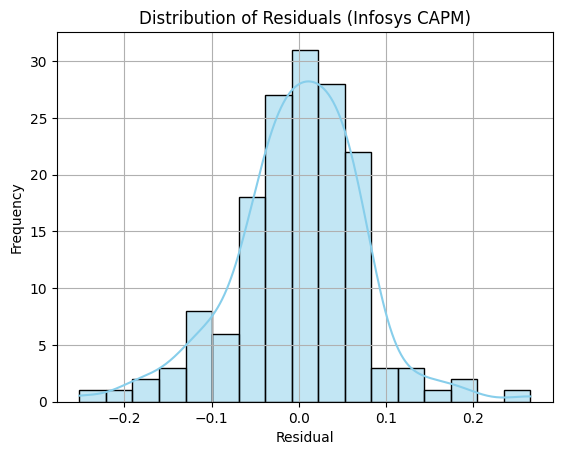

In [ ]:
sns.histplot(merged_df['Residuals'], kde=True, color='skyblue')
plt.title("Distribution of Residuals (Infosys CAPM)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()




> Line Plot of Residuals over Times



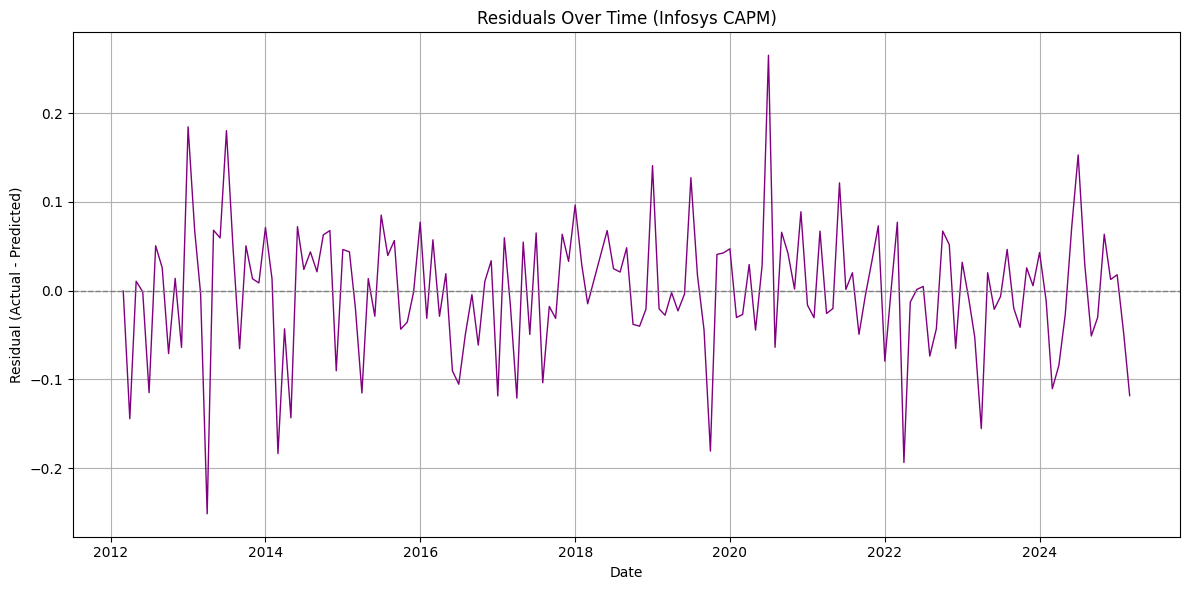

In [ ]:
# Convert 'Date' to datetime if needed
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Sort by Date just in case
merged_df = merged_df.sort_values('Date')

# Plot residuals over time
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Residuals'], color='purple', linewidth=1)

# Add zero line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Labels and formatting
plt.title("Residuals Over Time (Infosys CAPM)")
plt.xlabel("Date")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()



> Plot of Actual vs Predicted Infosys Excess Returns over Time



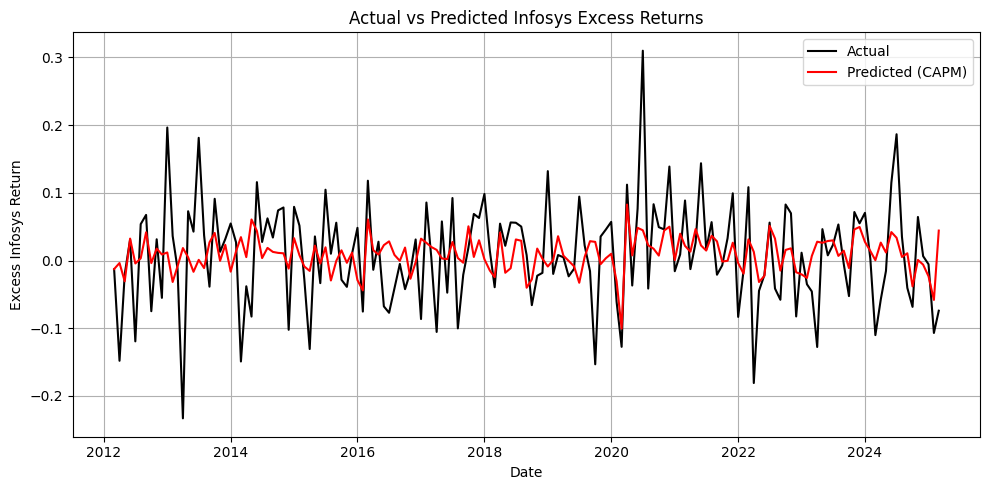

In [ ]:
merged_df['Predicted_Excess_INFY'] = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(merged_df['Date'], merged_df['Excess_INFY'], label='Actual', color='black')
plt.plot(merged_df['Date'], merged_df['Predicted_Excess_INFY'], label='Predicted (CAPM)', color='red')
plt.title("Actual vs Predicted Infosys Excess Returns")
plt.xlabel("Date")
plt.ylabel("Excess Infosys Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




> Regression Plot using Matplotlib



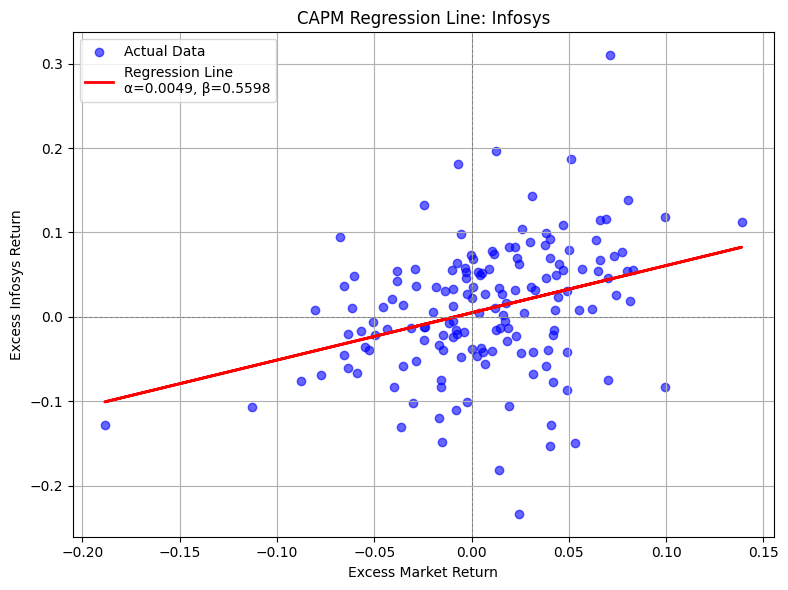

In [ ]:
# Generate predicted Y values using regression line
x_vals = merged_df['Excess_Market']
y_vals = alpha + beta * x_vals  # This is the regression line (y = α + βx)

# Plot actual data points
plt.figure(figsize=(8,6))
plt.scatter(x_vals, merged_df['Excess_INFY'], color='blue', alpha=0.6, label='Actual Data')

# Plot regression line
plt.plot(x_vals, y_vals, color='red', linewidth=2, label=f'Regression Line\nα={alpha:.4f}, β={beta:.4f}')

# Axis labels and title
plt.title('CAPM Regression Line: Infosys')
plt.xlabel('Excess Market Return')
plt.ylabel('Excess Infosys Return')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




> Regression Plot using Seaborn



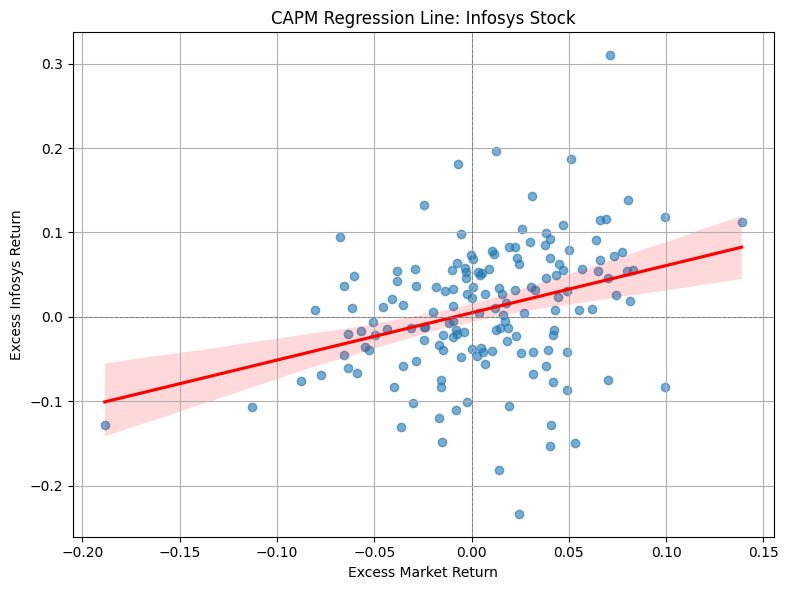

In [ ]:
df = pd.read_csv("/content/drive/My Drive/CAPM_Project/Final_Datasets/Infosys/CAPM_Dataset_INFOSYS.csv")

plt.figure(figsize=(8,6))

# Regression plot
sns.regplot(x='Excess_Market', y='Excess_INFY', data=df,
            line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})

# Labels and formatting
plt.title("CAPM Regression Line: Infosys Stock")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess Infosys Return")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)

plt.grid(True)
plt.tight_layout()
plt.show()



> Rolling Window Analysis of INFOSYS Stock



In [2]:
df = pd.read_csv("/content/drive/My Drive/CAPM_Project/Final_Datasets/Infosys/CAPM_Dataset_INFOSYS.csv", parse_dates=["Date"], index_col="Date")

def rolling_capm_beta(df, stock_col, market_col, window=36):
    betas = []
    dates = []

    for i in range(window, len(df)):
        window_data = df.iloc[i - window:i]
        X = sm.add_constant(window_data[market_col])
        y = window_data[stock_col]
        model = sm.OLS(y, X).fit()
        betas.append(model.params[market_col])
        dates.append(df.index[i])

    return pd.Series(betas, index=dates)

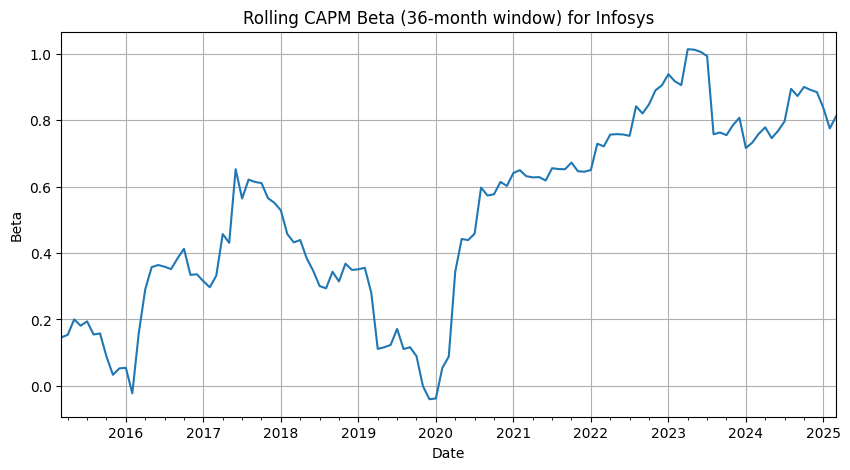

In [3]:
beta_series = rolling_capm_beta(df, "Excess_INFY", "Excess_Market", window=36)

# Plot
plt.figure(figsize=(10, 5))
beta_series.plot()
plt.title("Rolling CAPM Beta (36-month window) for Infosys")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.grid(True)
plt.show()





> RELIANCE Stock






> Scatter Plot of Excess Reliance Return and Excess Market Return



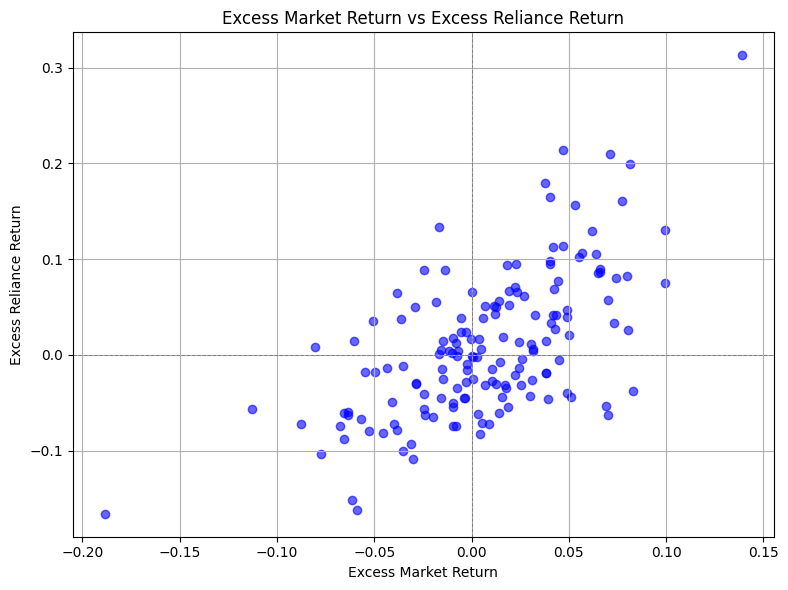

In [ ]:
# Replace with the actual path to your CSV file in Google Drive
file_path = "/content/drive/My Drive/CAPM_Project/Final_Datasets/Reliance/CAPM_Dataset_RELI.csv"

# Load the file
merged_df = pd.read_csv(file_path)

# Display a few rows
merged_df.head()

# Basic scatter plot
plt.figure(figsize=(8,6))
plt.scatter(merged_df['Excess_Market'], merged_df['Excess_RELI'], color='blue', alpha=0.6)

plt.title('Excess Market Return vs Excess Reliance Return')
plt.xlabel('Excess Market Return')
plt.ylabel('Excess Reliance Return')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.grid(True)
plt.tight_layout()
plt.show()



> Regression Fit



In [ ]:
# Define X and y
X = merged_df['Excess_Market']
y = merged_df['Excess_RELI']

# Add constant to estimate alpha (intercept)
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X).fit(cov_type='HC1')

# Show regression summary
print(model.summary())

alpha = model.params['const']
beta = model.params['Excess_Market']

print(f"Alpha (intercept): {alpha:.4f}")
print(f"Beta (slope): {beta:.4f}")

                            OLS Regression Results                            
Dep. Variable:            Excess_RELI   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     71.94
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           1.65e-14
Time:                        20:46:28   Log-Likelihood:                 223.27
No. Observations:                 157   AIC:                            -442.5
Df Residuals:                     155   BIC:                            -436.4
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0022      0.004      0.488



> Scatter Plot of Excess Market Return and Residuals





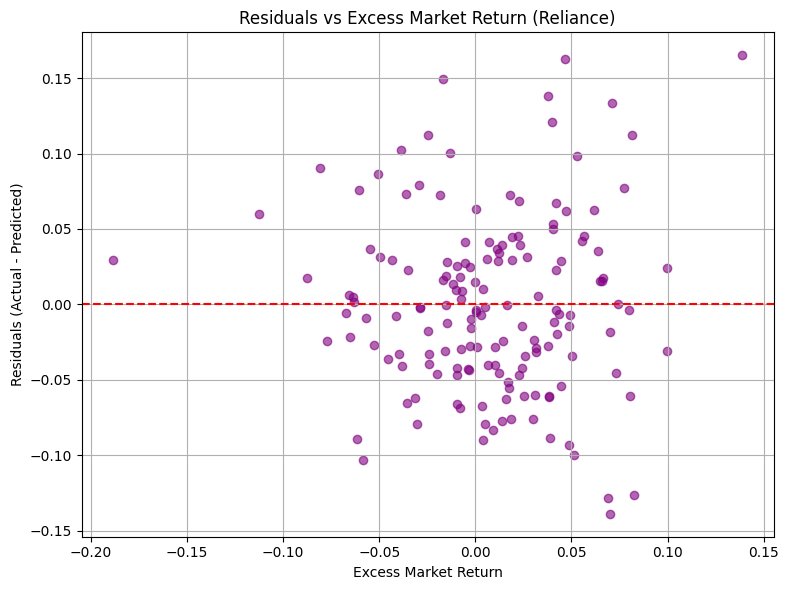

In [ ]:
# Step 1: Predict Infosys excess return using the model
merged_df['Predicted_Excess_RELI'] = model.predict(X)

# Step 2: Calculate residuals
merged_df['Residuals'] = y - merged_df['Predicted_Excess_RELI']

# Step 3: Plot residuals vs Excess Market Return
plt.figure(figsize=(8,6))
plt.scatter(X['Excess_Market'], merged_df['Residuals'], color='purple', alpha=0.6)

# Plot horizontal line at y = 0
plt.axhline(0, color='red', linestyle='--')

# Labels and title
plt.title("Residuals vs Excess Market Return (Reliance)")
plt.xlabel("Excess Market Return")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()



> Histogram of Residuals



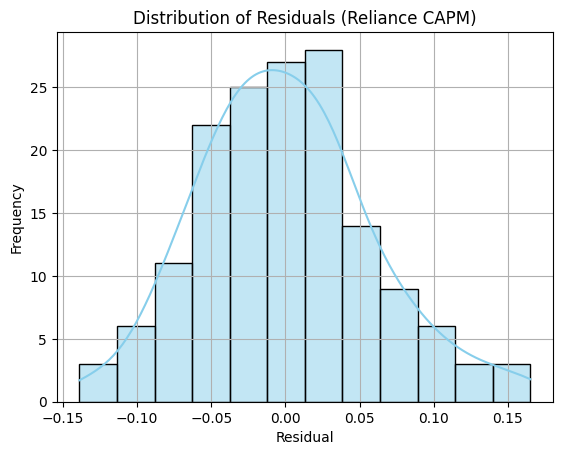

In [ ]:
sns.histplot(merged_df['Residuals'], kde=True, color='skyblue')
plt.title("Distribution of Residuals (Reliance CAPM)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()




> Line Plot of Residuals over Times


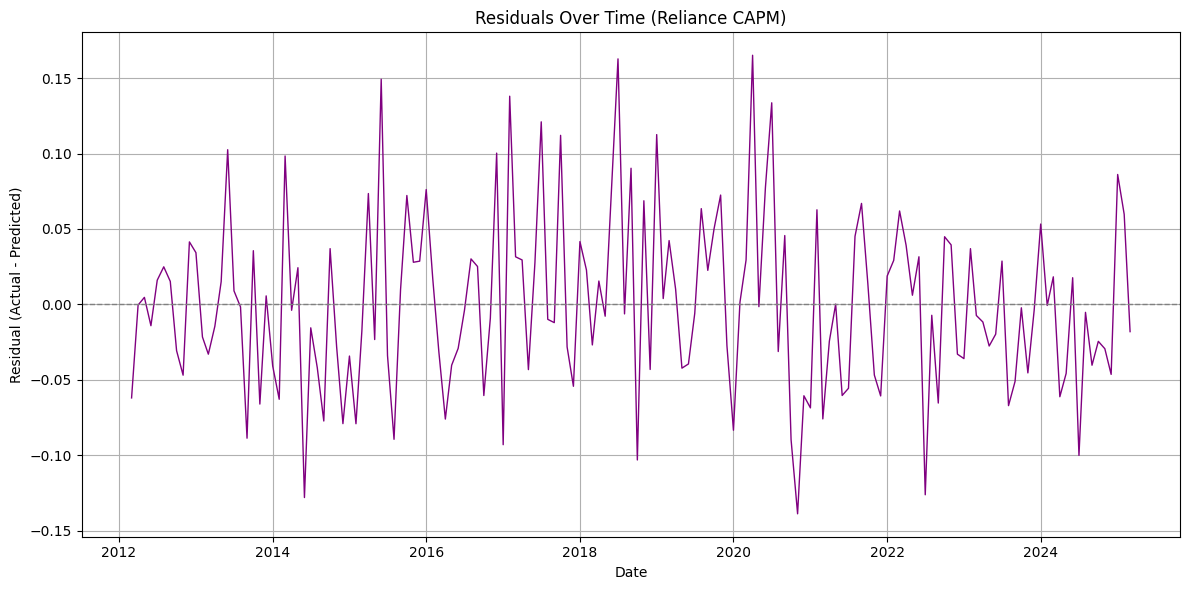

In [ ]:
# Convert 'Date' to datetime if needed
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Sort by Date just in case
merged_df = merged_df.sort_values('Date')

# Plot residuals over time
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Residuals'], color='purple', linewidth=1)

# Add zero line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Labels and formatting
plt.title("Residuals Over Time (Reliance CAPM)")
plt.xlabel("Date")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()



> Plot of Actual vs Predicted Reliance Excess Returns over Time






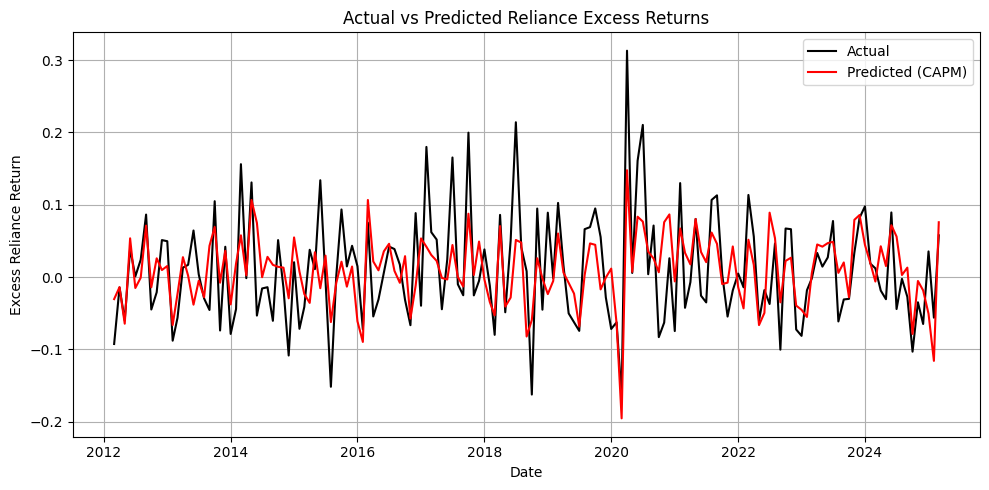

In [ ]:
merged_df['Predicted_Excess_RELI'] = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(merged_df['Date'], merged_df['Excess_RELI'], label='Actual', color='black')
plt.plot(merged_df['Date'], merged_df['Predicted_Excess_RELI'], label='Predicted (CAPM)', color='red')
plt.title("Actual vs Predicted Reliance Excess Returns")
plt.xlabel("Date")
plt.ylabel("Excess Reliance Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



> Regression Plot using Matplotlib



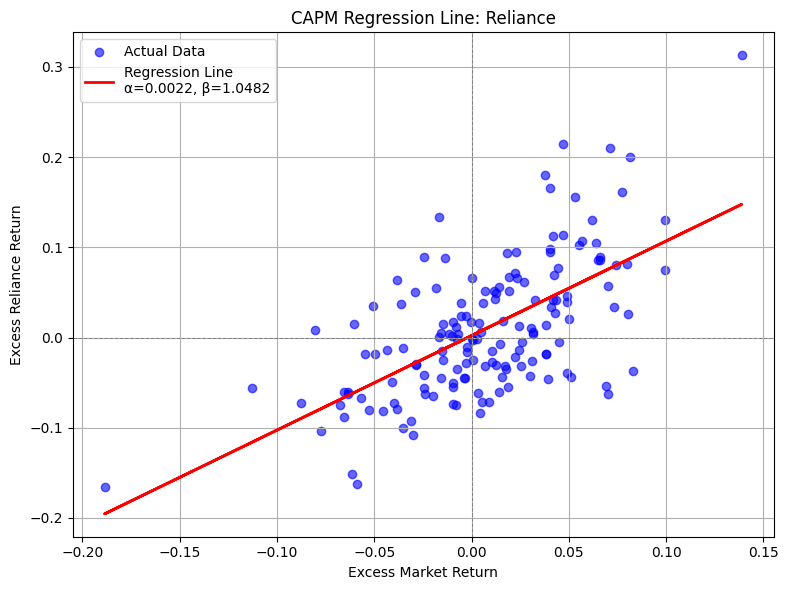

In [ ]:
# Generate predicted Y values using regression line
x_vals = merged_df['Excess_Market']
y_vals = alpha + beta * x_vals  # This is the regression line (y = α + βx)

# Plot actual data points
plt.figure(figsize=(8,6))
plt.scatter(x_vals, merged_df['Excess_RELI'], color='blue', alpha=0.6, label='Actual Data')

# Plot regression line
plt.plot(x_vals, y_vals, color='red', linewidth=2, label=f'Regression Line\nα={alpha:.4f}, β={beta:.4f}')

# Axis labels and title
plt.title('CAPM Regression Line: Reliance')
plt.xlabel('Excess Market Return')
plt.ylabel('Excess Reliance Return')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




> Regression Plot using Seaborn



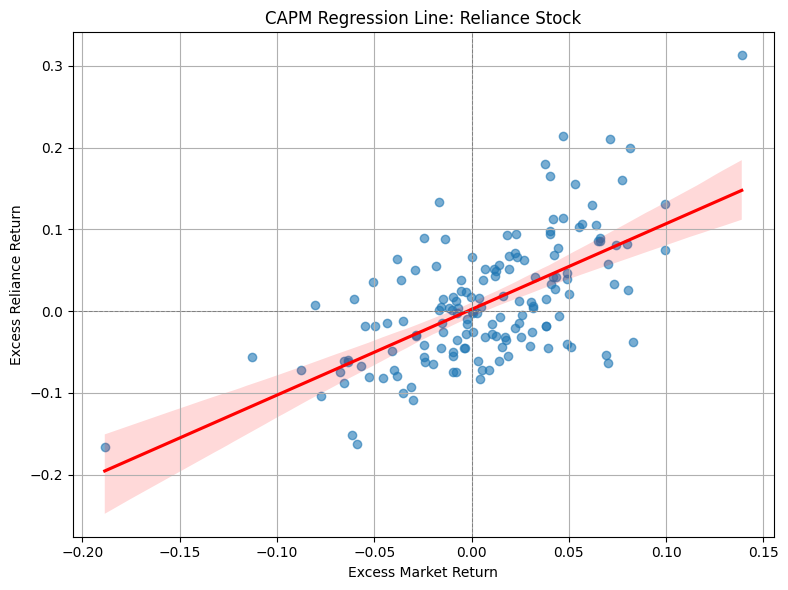

In [ ]:
df = pd.read_csv("/content/drive/My Drive/CAPM_Project/Final_Datasets/Reliance/CAPM_Dataset_RELI.csv")

plt.figure(figsize=(8,6))

# Regression plot
sns.regplot(x='Excess_Market', y='Excess_RELI', data=df,
            line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})

# Labels and formatting
plt.title("CAPM Regression Line: Reliance Stock")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess Reliance Return")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)

plt.grid(True)
plt.tight_layout()
plt.show()



> Rolling window analysis for RELIANCE Stock



In [4]:
df = pd.read_csv("/content/drive/My Drive/CAPM_Project/Final_Datasets/Reliance/CAPM_Dataset_RELI.csv", parse_dates=["Date"], index_col="Date")

def rolling_capm_beta(df, stock_col, market_col, window=36):
    betas = []
    dates = []

    for i in range(window, len(df)):
        window_data = df.iloc[i - window:i]
        X = sm.add_constant(window_data[market_col])
        y = window_data[stock_col]
        model = sm.OLS(y, X).fit()
        betas.append(model.params[market_col])
        dates.append(df.index[i])

    return pd.Series(betas, index=dates)

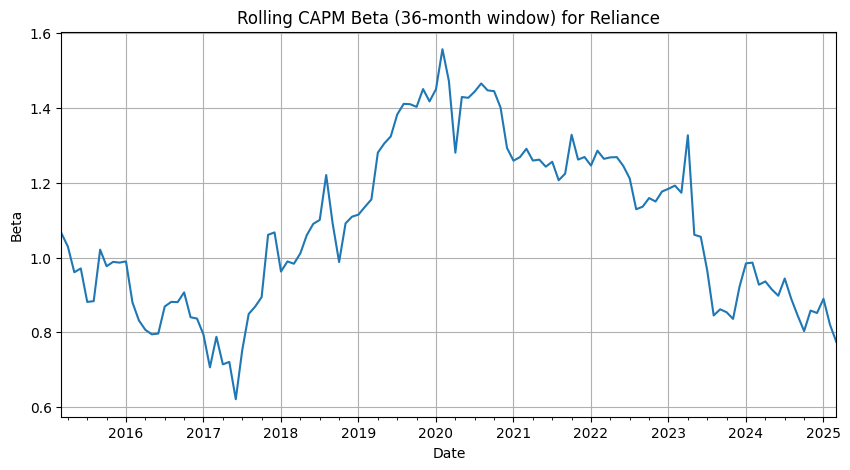

In [5]:
beta_series = rolling_capm_beta(df, "Excess_RELI", "Excess_Market", window=36)

# Plot
plt.figure(figsize=(10, 5))
beta_series.plot()
plt.title("Rolling CAPM Beta (36-month window) for Reliance")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.grid(True)
plt.show()



> HDFCBANK Stock




> Scatter Plot of Excess HDFCBANK Return and Excess Market Return



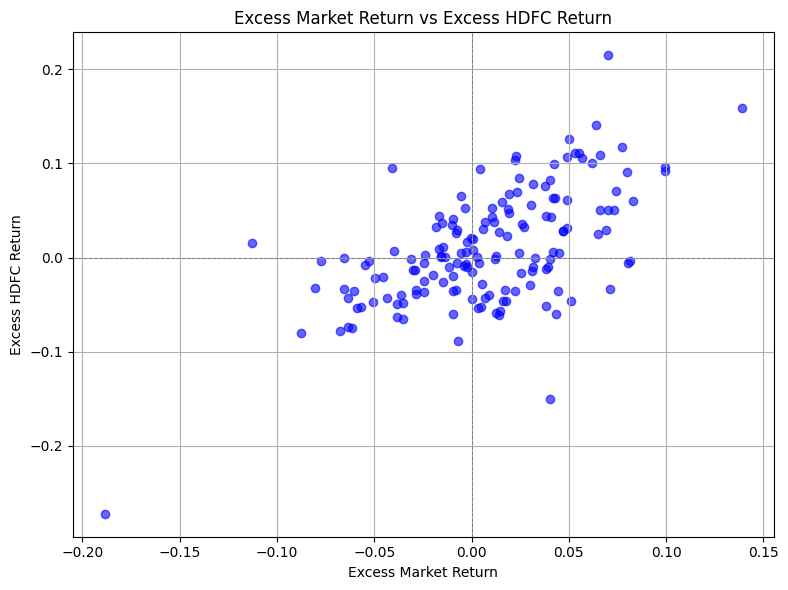

In [ ]:
# Replace with the actual path to your CSV file in Google Drive
file_path = "/content/drive/My Drive/CAPM_Project/Final_Datasets/HDFC Bank/CAPM_Dataset_HDFC.csv"

# Load the file
merged_df = pd.read_csv(file_path)

# Display a few rows
merged_df.head()

# Basic scatter plot
plt.figure(figsize=(8,6))
plt.scatter(merged_df['Excess_Market'], merged_df['Excess_HDFC'], color='blue', alpha=0.6)

plt.title('Excess Market Return vs Excess HDFC Return')
plt.xlabel('Excess Market Return')
plt.ylabel('Excess HDFC Return')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.grid(True)
plt.tight_layout()
plt.show()



> Regression Fit



In [ ]:
# Define X and y
X = merged_df['Excess_Market']
y = merged_df['Excess_HDFC']

# Add constant to estimate alpha (intercept)
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X).fit(cov_type='HC1')

# Show regression summary
print(model.summary())

alpha = model.params['const']
beta = model.params['Excess_Market']

print(f"Alpha (intercept): {alpha:.4f}")
print(f"Beta (slope): {beta:.4f}")

                            OLS Regression Results                            
Dep. Variable:            Excess_HDFC   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     51.84
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           2.44e-11
Time:                        20:52:30   Log-Likelihood:                 253.52
No. Observations:                 157   AIC:                            -503.0
Df Residuals:                     155   BIC:                            -496.9
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0038      0.004      0.975



> Scatter Plot of Excess Market Return and Residuals



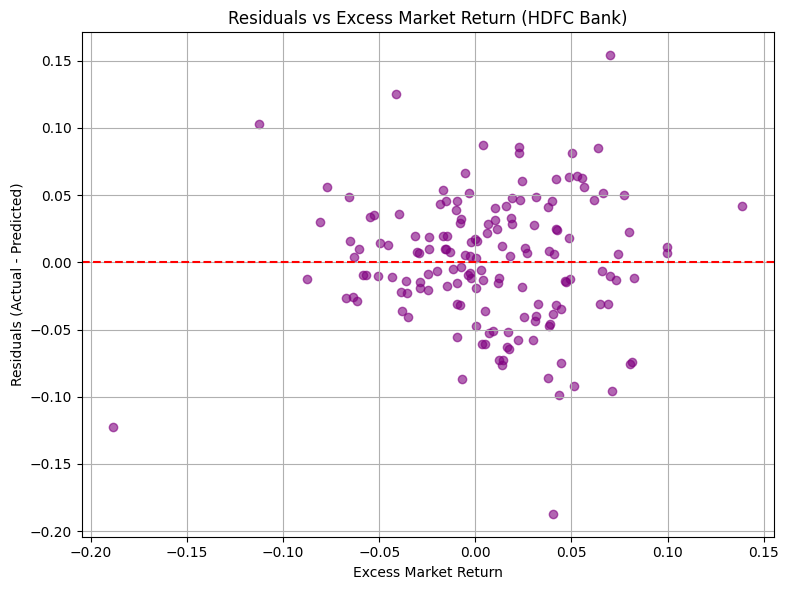

In [ ]:
# Step 1: Predict Infosys excess return using the model
merged_df['Predicted_Excess_HDFC'] = model.predict(X)

# Step 2: Calculate residuals
merged_df['Residuals'] = y - merged_df['Predicted_Excess_HDFC']

# Step 3: Plot residuals vs Excess Market Return
plt.figure(figsize=(8,6))
plt.scatter(X['Excess_Market'], merged_df['Residuals'], color='purple', alpha=0.6)

# Plot horizontal line at y = 0
plt.axhline(0, color='red', linestyle='--')

# Labels and title
plt.title("Residuals vs Excess Market Return (HDFC Bank)")
plt.xlabel("Excess Market Return")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()



> Histogram of Residuals



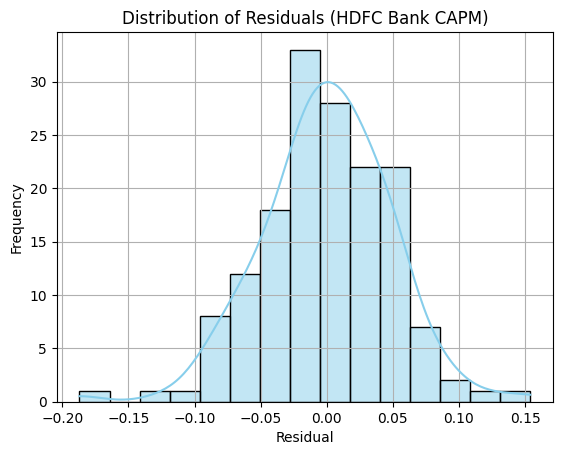

In [ ]:
sns.histplot(merged_df['Residuals'], kde=True, color='skyblue')
plt.title("Distribution of Residuals (HDFC Bank CAPM)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()




> Line Plot of Residuals over Times



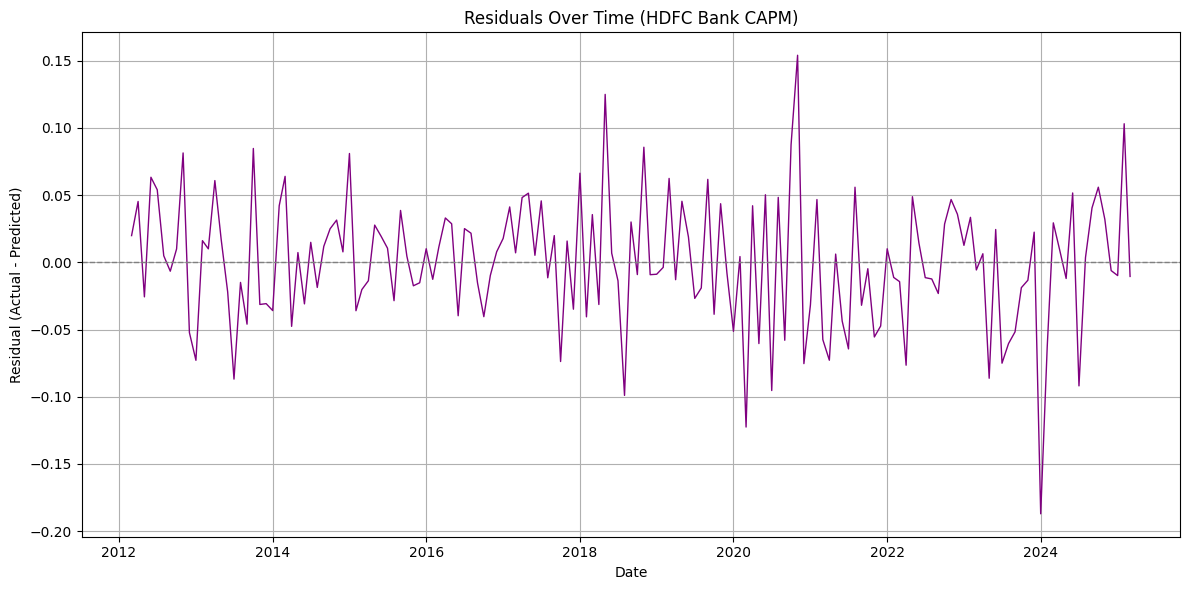

In [ ]:
# Convert 'Date' to datetime if needed
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Sort by Date just in case
merged_df = merged_df.sort_values('Date')

# Plot residuals over time
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Residuals'], color='purple', linewidth=1)

# Add zero line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Labels and formatting
plt.title("Residuals Over Time (HDFC Bank CAPM)")
plt.xlabel("Date")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()



> Plot of Actual vs Predicted HDFC Bank Excess Returns over Time



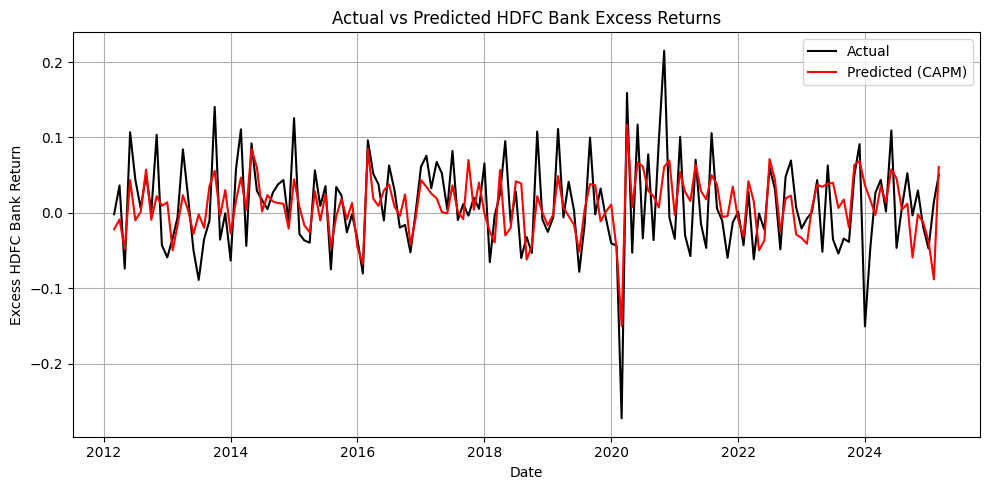

In [ ]:
merged_df['Predicted_Excess_HDFC'] = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(merged_df['Date'], merged_df['Excess_HDFC'], label='Actual', color='black')
plt.plot(merged_df['Date'], merged_df['Predicted_Excess_HDFC'], label='Predicted (CAPM)', color='red')
plt.title("Actual vs Predicted HDFC Bank Excess Returns")
plt.xlabel("Date")
plt.ylabel("Excess HDFC Bank Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



> Regression Plot using Matplotlib



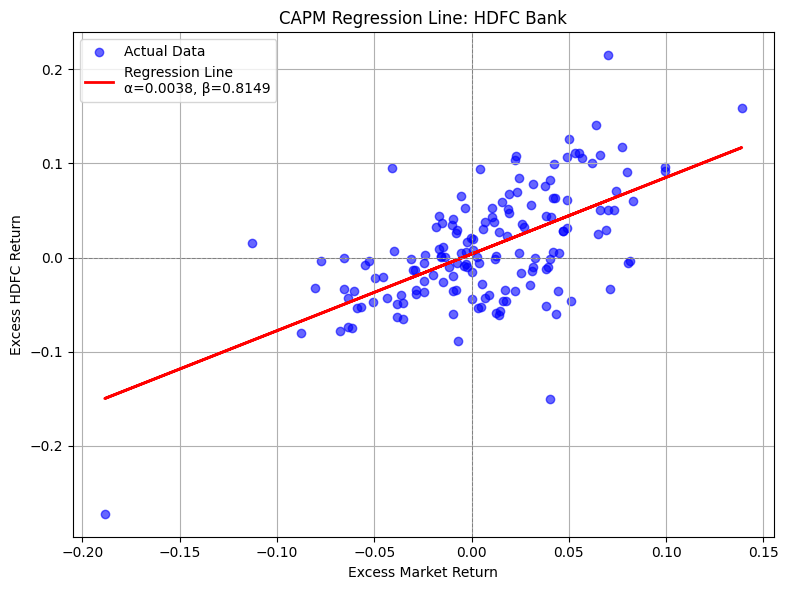

In [ ]:
# Generate predicted Y values using regression line
x_vals = merged_df['Excess_Market']
y_vals = alpha + beta * x_vals  # This is the regression line (y = α + βx)

# Plot actual data points
plt.figure(figsize=(8,6))
plt.scatter(x_vals, merged_df['Excess_HDFC'], color='blue', alpha=0.6, label='Actual Data')

# Plot regression line
plt.plot(x_vals, y_vals, color='red', linewidth=2, label=f'Regression Line\nα={alpha:.4f}, β={beta:.4f}')

# Axis labels and title
plt.title('CAPM Regression Line: HDFC Bank')
plt.xlabel('Excess Market Return')
plt.ylabel('Excess HDFC Return')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




> Regression Plot using Seaborn



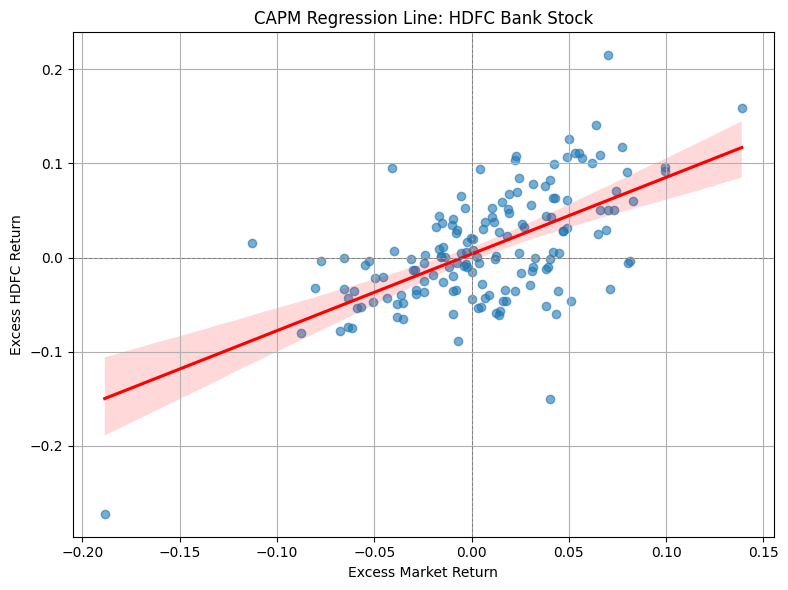

In [ ]:
df = pd.read_csv("/content/drive/My Drive/CAPM_Project/Final_Datasets/HDFC Bank/CAPM_Dataset_HDFC.csv")

plt.figure(figsize=(8,6))

# Regression plot
sns.regplot(x='Excess_Market', y='Excess_HDFC', data=df,
            line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})

# Labels and formatting
plt.title("CAPM Regression Line: HDFC Bank Stock")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess HDFC Return")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)

plt.grid(True)
plt.tight_layout()
plt.show()



> Rolling Window analysis for HDFCBank Stock



In [6]:
df = pd.read_csv("/content/drive/My Drive/CAPM_Project/Final_Datasets/HDFC Bank/CAPM_Dataset_HDFC.csv", parse_dates=["Date"], index_col="Date")

def rolling_capm_beta(df, stock_col, market_col, window=36):
    betas = []
    dates = []

    for i in range(window, len(df)):
        window_data = df.iloc[i - window:i]
        X = sm.add_constant(window_data[market_col])
        y = window_data[stock_col]
        model = sm.OLS(y, X).fit()
        betas.append(model.params[market_col])
        dates.append(df.index[i])

    return pd.Series(betas, index=dates)

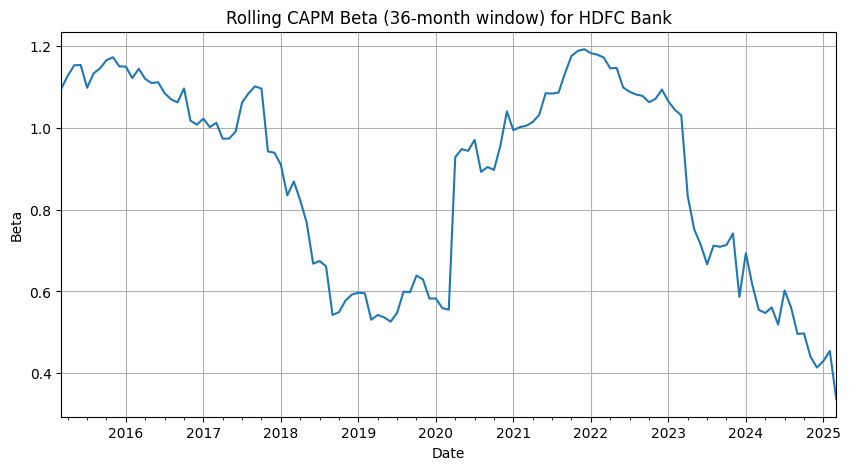

In [7]:
beta_series = rolling_capm_beta(df, "Excess_HDFC", "Excess_Market", window=36)

# Plot
plt.figure(figsize=(10, 5))
beta_series.plot()
plt.title("Rolling CAPM Beta (36-month window) for HDFC Bank")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.grid(True)
plt.show()